In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colorset = sns.color_palette('Paired', 8)
sns.set()

In [2]:
data = pd.read_csv("movies.csv", engine='python')

#### Посмотрим на данные

In [3]:
data.head(n=7)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986
6,25000000.0,Henson Associates (HA),UK,Jim Henson,Adventure,12729917.0,Labyrinth,PG,1986-06-27,101,7.4,David Bowie,102879,Dennis Lee,1986


#### Базовая инофрмация

In [4]:
len(data)

6820

In [5]:
print(data.company.unique(), len(data.company.unique()))

['Columbia Pictures Corporation' 'Paramount Pictures'
 'Twentieth Century Fox Film Corporation' ... 'Anna Biller Productions'
 'Siempre Viva Productions' 'Borderline Presents'] 2179


In [6]:
print(data.country.unique(), len(data.country.unique()))

['USA' 'UK' 'Australia' 'Italy' 'France' 'Sweden' 'Japan' 'Spain'
 'Switzerland' 'Canada' 'Israel' 'Netherlands' 'Argentina' 'Denmark'
 'West Germany' 'Hong Kong' 'Belgium' 'Ireland' 'South Africa' 'Hungary'
 'Iran' 'New Zealand' 'Germany' 'China' 'Peru' 'Soviet Union' 'Mexico'
 'Brazil' 'Taiwan' 'India' 'Austria' 'Portugal' 'Cuba'
 'Republic of Macedonia' 'Russia' 'Greece' 'Norway' 'Romania' 'Jamaica'
 'Federal Republic of Yugoslavia' 'Aruba' 'Czech Republic' 'South Korea'
 'Finland' 'Thailand' 'Colombia' 'Palestine' 'Indonesia' 'Saudi Arabia'
 'Chile' 'Poland' 'Kenya' 'Bahamas' 'Ukraine' 'Iceland' 'Malta' 'Panama'] 57


In [7]:
print(data.director.unique(), len(data.director.unique()))

['Rob Reiner' 'John Hughes' 'Tony Scott' ... 'Sam Liu' 'Nicolas Pesce'
 'Nicole Garcia'] 2759


In [8]:
print(data.genre.unique(), len(data.genre.unique()))

['Adventure' 'Comedy' 'Action' 'Drama' 'Crime' 'Thriller' 'Horror'
 'Animation' 'Biography' 'Sci-Fi' 'Musical' 'Family' 'Fantasy' 'Mystery'
 'War' 'Romance' 'Western'] 17


In [9]:
print(data.star.unique(), len(data.star.unique()))

['Wil Wheaton' 'Matthew Broderick' 'Tom Cruise' ... 'Samantha Robinson'
 'Jennifer Saunders' 'Kika Magalh�es'] 2504


In [10]:
print(data.writer.unique(), len(data.writer.unique()))

['Stephen King' 'John Hughes' 'Jim Cash' ... 'Brian Azzarello'
 'Nicolas Pesce' 'Milena Agus'] 4199


#### Самый дорогой фильм

In [11]:
data[data.budget == data.budget.max()]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
4631,300000000.0,Walt Disney Pictures,USA,Gore Verbinski,Action,309420425.0,Pirates of the Caribbean: At World's End,PG-13,2007-05-25,169,7.1,Johnny Depp,514191,Ted Elliott,2007


#### И наоборот...

In [12]:
data[data.budget == data.budget.min()]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
25,0.0,TriStar Pictures,USA,John Badham,Comedy,40697761.0,Short Circuit,PG,1986-05-09,98,6.6,Ally Sheedy,47068,S.S. Wilson,1986
26,0.0,Neue Constantin Film,Italy,Jean-Jacques Annaud,Crime,7153487.0,The Name of the Rose,R,1986-09-24,130,7.8,Sean Connery,86991,Umberto Eco,1986
27,0.0,TriStar Pictures,USA,Sidney J. Furie,Action,24159872.0,Iron Eagle,PG-13,1986-01-17,117,5.3,Louis Gossett Jr.,11304,Kevin Alyn Elders,1986
32,0.0,Gaumont,France,Jean-Jacques Beineix,Drama,2003822.0,Betty Blue,Not specified,1986-11-07,120,7.4,Jean-Hugues Anglade,14562,Philippe Djian,1986
35,0.0,Columbia Pictures Corporation,USA,John G. Avildsen,Action,115103979.0,The Karate Kid Part II,PG,1986-06-20,113,5.9,Pat Morita,58370,Robert Mark Kamen,1986
36,0.0,Lorimar Productions,USA,Nick Castle,Drama,7177431.0,The Boy Who Could Fly,PG,1986-09-26,114,6.5,Lucy Deakins,4623,Nick Castle,1986
41,0.0,Universal Pictures,USA,Don Bluth,Animation,47483002.0,An American Tail,G,1986-11-21,80,6.9,Dom DeLuise,41004,Judy Freudberg,1986
48,0.0,Metro-Goldwyn-Mayer (MGM),USA,Peter Hyams,Action,38500726.0,Running Scared,R,1986-06-27,107,6.5,Gregory Hines,9344,Gary DeVore,1986
49,0.0,Hawn / Sylbert Movie Company,USA,Michael Ritchie,Comedy,26285544.0,Wildcats,R,1986-02-14,106,5.9,Goldie Hawn,10239,Ezra Sacks,1986
56,0.0,TaliaFilm II Productions,USA,Hal Needham,Drama,2015882.0,Rad,PG,1986-03-28,91,7.2,Bart Conner,4039,Sam Bernard,1986


#### Много фильмов с "нулевым" бюджетом, это пропуски

In [13]:
data[data.gross == data.gross.min()]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6784,0.0,Magic Lantern,Spain,Carles Torrens,Horror,70.0,Pet,R,2016-12-02,94,5.7,Dominic Monaghan,10504,Jeremy Slater,2016


#### Строим графики

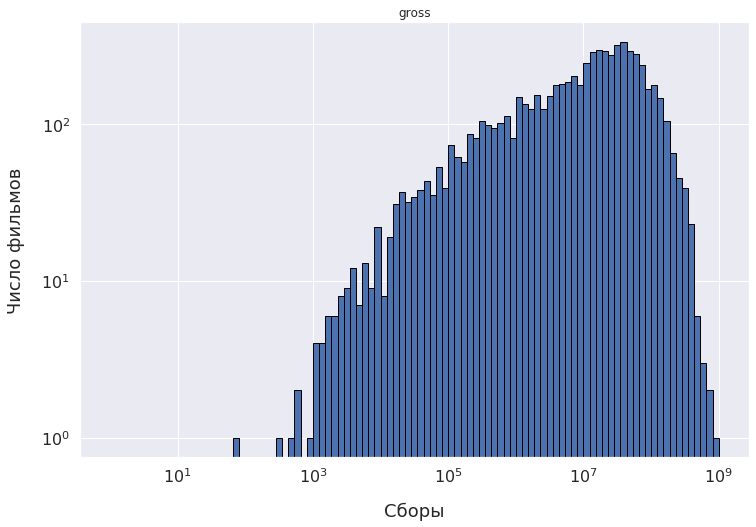

In [14]:
data.hist('gross', figsize=(12, 8), bins=[0] + list(np.logspace(0, 9, num=100)), ec='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Сборы", labelpad=16, size=18)
plt.ylabel("Число фильмов", labelpad=16, size=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('gross-stat.png')

In [15]:
data.loc[data.gross.sort_values(ascending=True)[:10].index, ['budget', 'name', 'director', 'gross', 'country']]

,budget,name,director,gross,country
6784,0.0,Pet,Carles Torrens,70.0,Spain
2594,15000000.0,Trojan War,George Huang,309.0,USA
6066,0.0,I Spit on Your Grave 2,Steven R. Monroe,441.0,USA
5699,0.0,The Decoy Bride,Sheree Folkson,542.0,UK
5917,0.0,Into the White,Petter N�ss,547.0,Norway
5242,0.0,Perrier's Bounty,Ian Fitzgibbon,828.0,Ireland
1319,0.0,Samantha,Stephen La Rocque,1076.0,USA
5711,5000000.0,Flypaper,Rob Minkoff,1098.0,Germany
3255,0.0,"Love, Honor and Obey",Dominic Anciano,1143.0,UK
5671,0.0,Chalet Girl,Phil Traill,1201.0,UK


#### В основном (кроме первого фильма) - сборы в США
#### Проверим бюджеты

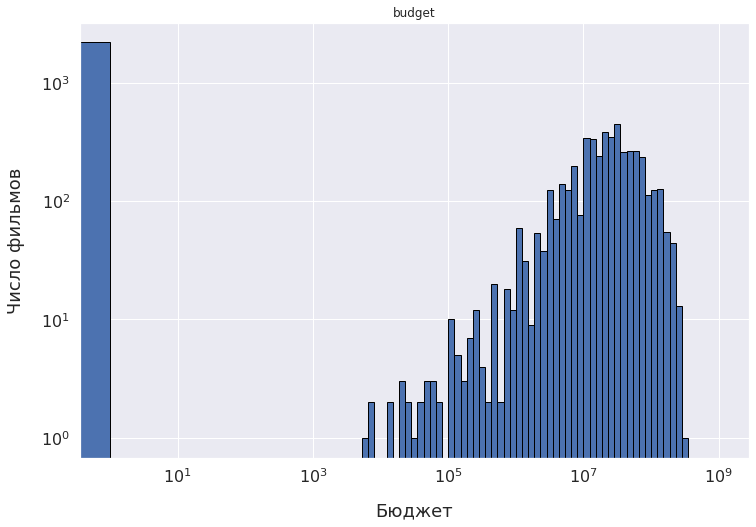

In [16]:
data.hist('budget', figsize=(12, 8), bins=[0] + list(np.logspace(0, 9, num=100)), ec='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Бюджет", labelpad=16, size=18)
plt.ylabel("Число фильмов", labelpad=16, size=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('budget-stat.png')

#### Других проблем не замечено

#### Строим дальше

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 12

In [18]:
known_budget_films = data[data.budget!=0]

In [19]:
mean_budget_by_year = dict(zip(data.year.unique(), [[] for _ in range(31)]))
for year, budget in zip(list(known_budget_films.year), list(known_budget_films.budget)):
    mean_budget_by_year[year].append(budget)
for year in mean_budget_by_year.keys():
    mean_budget_by_year[year] = sum(mean_budget_by_year[year]) / len(mean_budget_by_year[year])
    
infl = [2.23, 2.25,  2.16, 2.05, 1.96, 1.87, 1.82, 1.77, 1.72, 1.67, 1.63, 1.59, 1.56, 1.53, 1.48, 1.43, 1.42, 1.39, 1.34, 1.31, 1.26, 1.22, 1.16, 1.18, 1.17, 1.13, 1.11, 1.09, 1.08, 1.08, 1.06]
new_mean_budget_by_year = mean_budget_by_year.copy()
for i in range(1986, 2017):
    new_mean_budget_by_year[i] *= infl[i-1986]

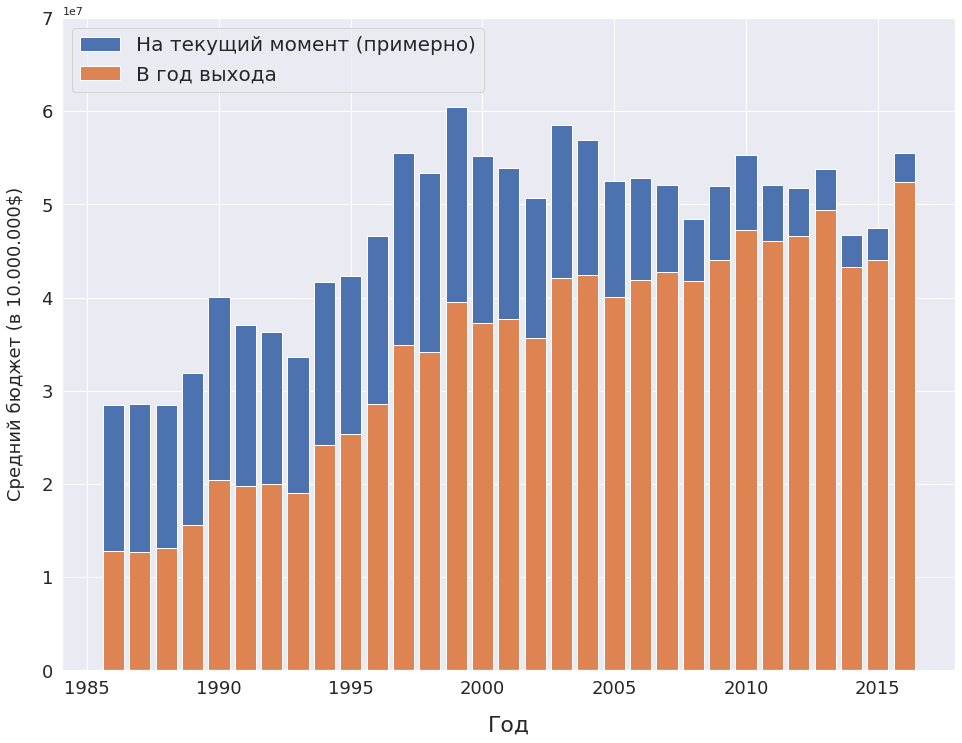

In [20]:
plt.ylim(0,  7* 10**7)
plt.bar(new_mean_budget_by_year.keys(), new_mean_budget_by_year.values())
plt.bar(mean_budget_by_year.keys(), mean_budget_by_year.values())
plt.legend(['На текущий момент (примерно)', 'В год выхода'], loc='upper left',  prop={'size': 20})#, bbox_to_anchor=(1, 1))

plt.xlabel("Год", labelpad=18, size=22)
plt.ylabel("Средний бюджет (в 10.000.000$)", labelpad=16, size=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('av_budget.png')

In [21]:
rating_by_year = pd.crosstab(data.year, data.rating)

In [22]:
lst = ['G', 'PG', 'PG-13', 'R', 'NC-17', 'NOT RATED', 'UNRATED', 'Not specified']
rating_by_year[lst + list(set(data.rating.unique()) ^ set(lst))]

rating,G,PG,PG-13,R,NC-17,NOT RATED,UNRATED,Not specified,B15,TV-14,TV-PG,TV-MA,B
year,,,,,,,,,,,,,
1986,8,53,46,102,1,0,4,6,0,0,0,0,0
1987,5,50,41,117,0,2,0,4,0,0,0,0,0
1988,3,54,35,124,0,1,0,3,0,0,0,0,0
1989,5,38,57,115,2,2,0,2,0,0,0,0,0
1990,6,34,55,118,1,2,1,3,0,0,0,0,0
1991,6,32,48,127,1,2,2,1,0,0,1,0,0
1992,4,31,55,112,3,3,6,6,0,0,0,0,0
1993,6,42,57,102,1,5,3,4,0,0,0,0,0
1994,7,49,58,98,0,5,3,0,0,0,0,0,0


#### Наиболее частые случаи, кроме пяти стандартных рейтингов - 'UNRATED', 'NOT RATED' и 'Not specified'

In [23]:
standart_ratings = ['G', 'PG', 'PG-13', 'R', 'NC-17']
other = list(set(rating_by_year.columns.unique()) ^ set(standart_ratings))

In [24]:
other

['B15',
 'NOT RATED',
 'Not specified',
 'TV-MA',
 'UNRATED',
 'TV-14',
 'TV-PG',
 'B']

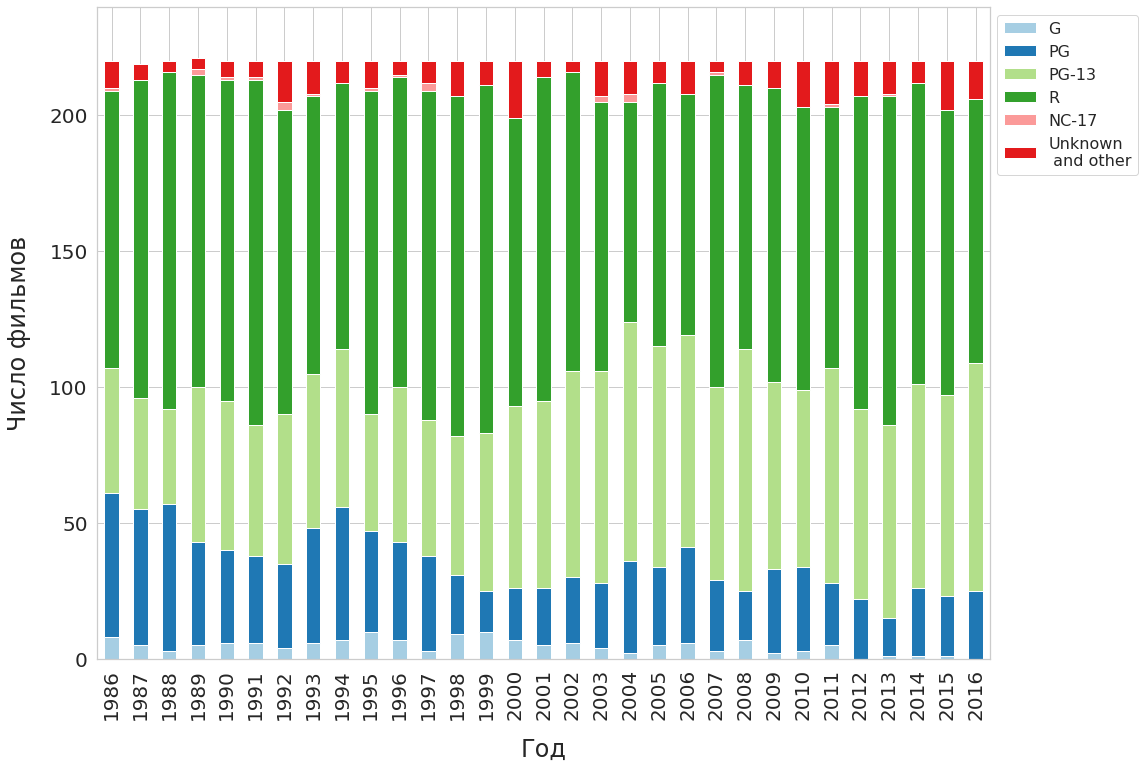

In [25]:
sns.set(style='whitegrid')
rating_by_year['Unknown\n and other'] = rating_by_year[other].sum(axis=1)
rating_by_year[standart_ratings + ['Unknown\n and other']].plot.bar(stacked='True', color=colorset)#(lw=5, ds='steps', figsize=(16,11), grid=True)
plt.legend(loc='upper right', bbox_to_anchor=(1.175,1), prop={'size': 16})
plt.xlabel("Год", labelpad=18, size=24)
plt.ylabel("Число фильмов", labelpad=18, size=24)
plt.ylim(0,240)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('year-rate.png', bbox_inches="tight")
plt.show()

In [26]:
import collections
collections.Counter(data.year)

Counter({1986: 220,
         1987: 219,
         1989: 221,
         1988: 220,
         1990: 220,
         1991: 220,
         1992: 220,
         1993: 220,
         1994: 220,
         1995: 220,
         1996: 220,
         1997: 220,
         1998: 220,
         1999: 220,
         2000: 220,
         2001: 220,
         2002: 220,
         2003: 220,
         2004: 220,
         2005: 220,
         2006: 220,
         2007: 220,
         2008: 220,
         2009: 220,
         2010: 220,
         2011: 220,
         2012: 220,
         2013: 220,
         2014: 220,
         2015: 220,
         2016: 220})

#### Не совсем по 220

In [27]:
genre_by_year = pd.crosstab(data.year, data.genre)
genre_by_year

genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,
1986,49,16,7,7,65,12,46,2,0,10,1,0,0,1,4,0,0
1987,47,9,1,7,79,17,40,0,4,11,0,1,0,1,2,0,0
1988,35,9,5,6,82,14,48,1,3,11,0,1,2,0,1,2,0
1989,46,15,2,11,78,13,40,1,3,10,0,0,0,1,1,0,0
1990,46,11,4,9,71,17,47,2,2,8,0,1,0,1,1,0,0
1991,42,9,5,6,81,15,54,0,0,3,0,3,1,0,1,0,0
1992,37,14,6,11,62,25,54,0,1,7,0,1,1,0,1,0,0
1993,34,12,5,11,65,19,62,1,2,7,0,0,1,0,0,0,1
1994,33,16,5,13,93,17,34,3,2,2,0,1,1,0,0,0,0


In [28]:
lst = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Horror']
other = list(set(genre_by_year.columns.unique()) ^ set(lst))
genre_by_year['Other'] = genre_by_year[other].sum(axis=1)

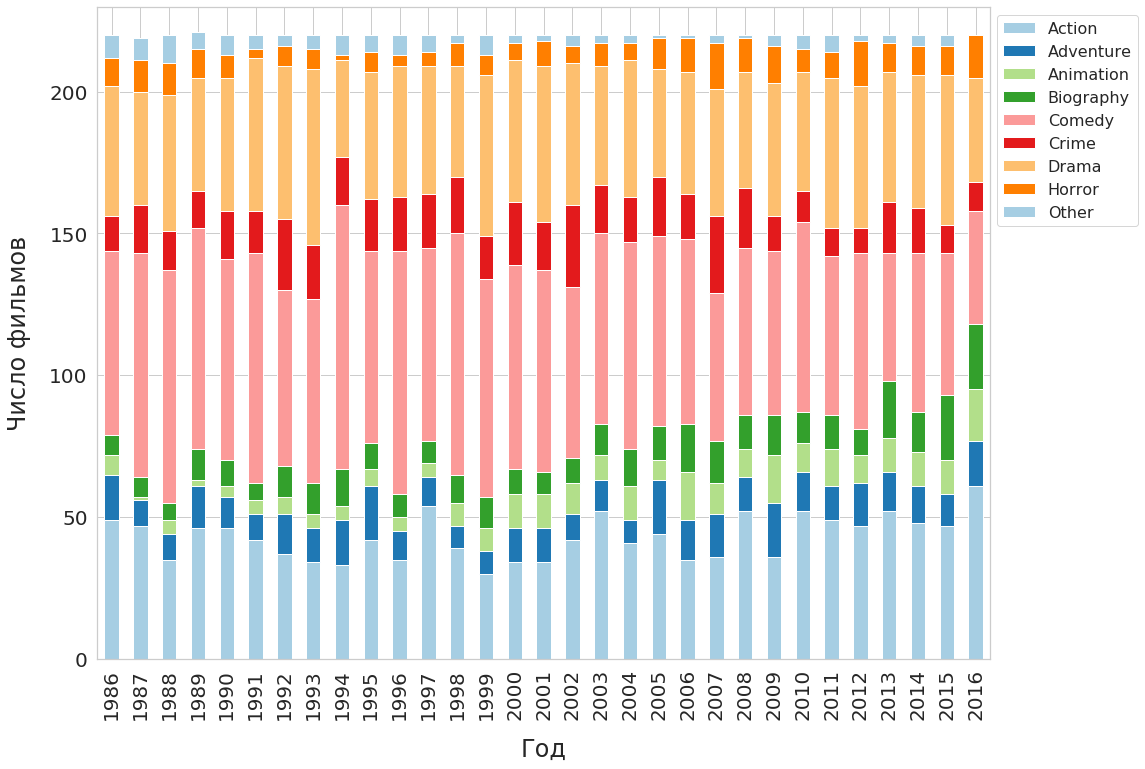

In [29]:
genre_by_year[lst + ['Other']].plot.bar(stacked='True', color=colorset)
plt.legend(loc='upper right', bbox_to_anchor=(1.175,1), prop={'size': 16})
plt.xlabel("Год", labelpad=18, size=24)
plt.ylabel("Число фильмов", labelpad=18, size=24)
plt.ylim(0,230)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('year-genre.png', bbox_inches="tight")
plt.show()

In [30]:
sns.set()

In [31]:
data.score[:10]

0    8.1
1    7.8
2    6.9
3    8.4
4    6.9
5    8.1
6    7.4
7    7.8
8    6.8
9    7.5
Name: score, dtype: float64

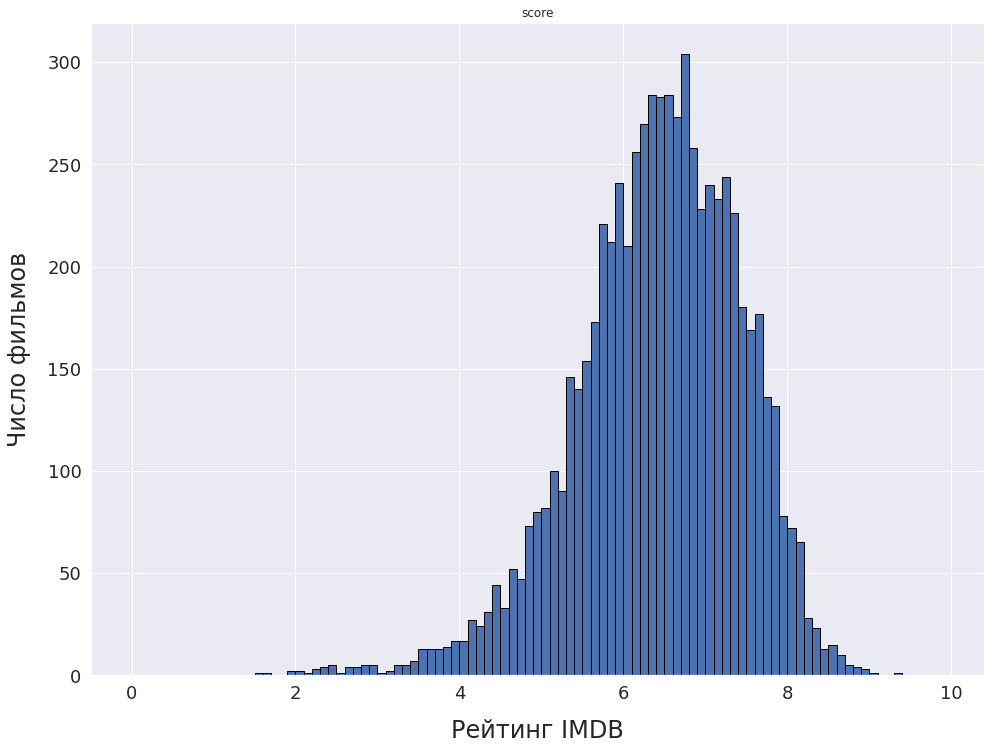

In [32]:
data.hist('score', bins=[float(i) / 10 for i in range(100)], ec='black')
plt.xlabel("Рейтинг IMDB", labelpad=16, size=24)
plt.ylabel("Число фильмов", labelpad=16, size=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('score-stat.png')

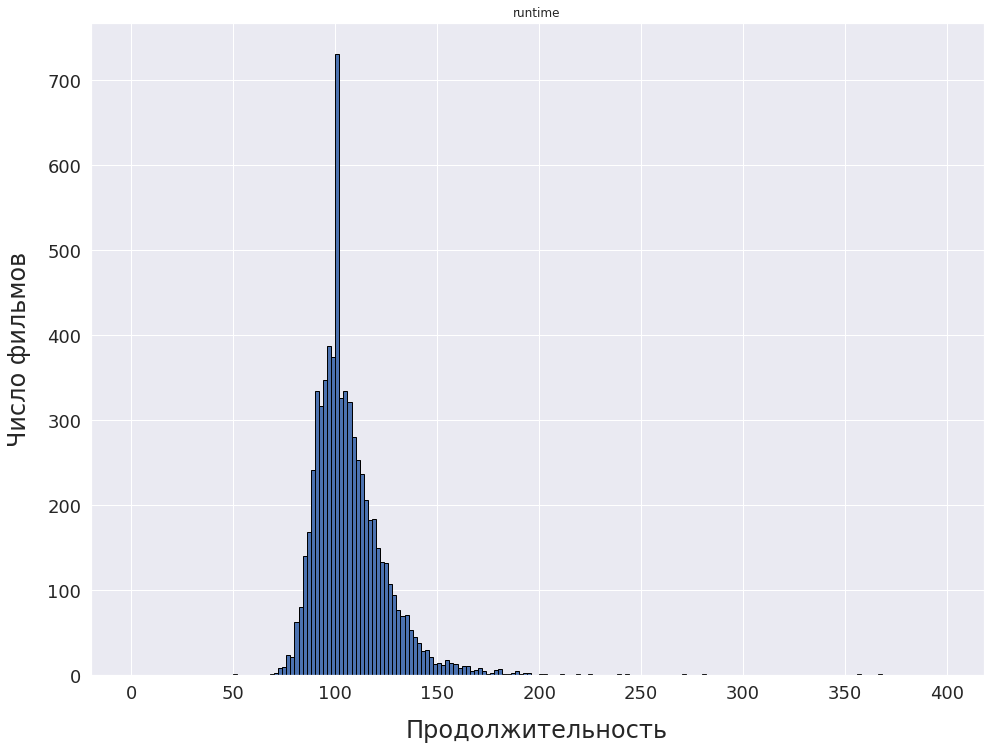

In [33]:
data.hist('runtime', bins=[i*2 for i in range(200)], ec='black')
plt.xlabel("Продолжительность", labelpad=16, size=24)
plt.ylabel("Число фильмов", labelpad=16, size=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('runtime-stat.png')

In [34]:
print(len(data[data.runtime == 100]) + len(data[data.runtime == 101]))
print(len(data[data.runtime == 100]))
print(len(data[data.runtime == 101]))

731
546
185


In [35]:
data[data.runtime == 100].head(n=20)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
12,6000000.0,Twentieth Century Fox Film Corporation,USA,David Seltzer,Comedy,8200000.0,Lucas,PG-13,1986-03-28,100,6.8,Corey Haim,12228,David Seltzer,1986
58,12000000.0,Cannon Pictures,USA,Tobe Hooper,Horror,4884663.0,Invaders from Mars,PG,1986-06-06,100,5.5,Karen Black,5878,Richard Blake,1986
96,0.0,New World Pictures,USA,Harley Cokeliss,Action,6637565.0,Black Moon Rising,R,1986-01-10,100,5.4,Tommy Lee Jones,4045,John Carpenter,1986
121,13000000.0,Metro-Goldwyn-Mayer (MGM),USA,Brian De Palma,Comedy,8475466.0,Wise Guys,R,1986-04-18,100,5.6,Danny DeVito,4573,George Gallo,1986
133,6000000.0,Golan-Globus Productions,USA,J. Lee Thompson,Action,9947631.0,Murphy's Law,R,1986-04-18,100,5.9,Charles Bronson,3561,Gail Morgan Hickman,1986
148,0.0,Cannon Screen Entertainment,UK,Richard Franklin,Horror,1720450.0,Link,R,1986-09-19,100,5.9,Terence Stamp,2080,Lee David Zlotoff,1986
161,0.0,Canadian Broadcasting Corporation (CBC),Canada,Charles Jarrott,Biography,275000.0,The Boy in Blue,R,1986-01-17,100,5.4,Nicolas Cage,907,Douglas Bowie,1986
167,0.0,Balcor Film Investors,USA,Andrew Lane,Action,1943751.0,Jake Speed,PG,1986-05-30,100,5.3,Wayne Crawford,632,Wayne Crawford,1986
181,0.0,Portreeve,UK,Simon Langton,Thriller,1500000.0,The Whistle Blower,PG,1987-07-10,100,6.2,Michael Caine,1672,Julian Bond,1986
186,0.0,Cam�ras Continentales,Denmark,Henning Carlsen,Biography,583800.0,Oviri,R,1986-09-05,100,6.2,Donald Sutherland,275,Henning Carlsen,1986


#### Как минимум "Nutcracker" и  "Otello" идут не 100 минут

In [36]:
import collections
star_film_count = dict(collections.Counter(data.star))

In [37]:
film_count_star = {i: [] for i in range(1, max(star_film_count.values()) + 1)}
for actor in star_film_count.keys():
    film_count_star[star_film_count[actor]].append(actor)

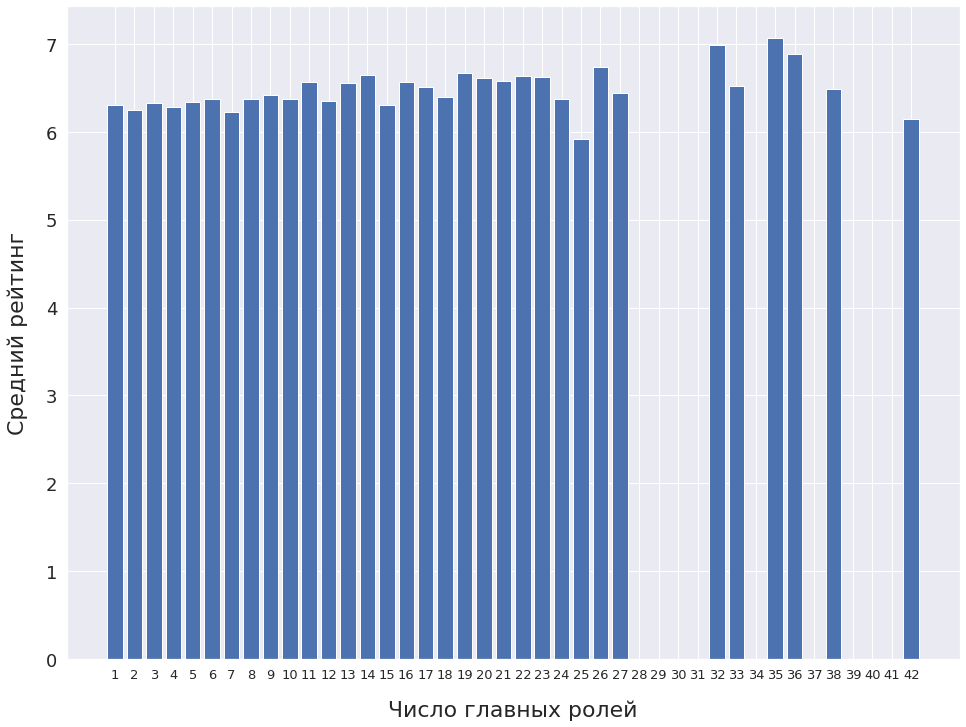

In [38]:
final_dict = {}
for i in range(1, max(star_film_count.values()) + 1):
    final_dict[str(i)] = data[data.star.isin(film_count_star[i])].score.mean()

plt.bar(final_dict.keys(), final_dict.values())
plt.xlabel('Число главных ролей', labelpad=18, size=22)
plt.ylabel("Средний рейтинг", labelpad=18, size=22)
plt.xticks(fontsize=13)
plt.yticks(fontsize=18)
plt.savefig('actors.png')

In [39]:
director_film_count = dict(collections.Counter(data.director))

In [40]:
film_count_director = {i: [] for i in range(1, max(director_film_count.values()) + 1)}
for director in director_film_count.keys():
    film_count_director[director_film_count[director]].append(director)

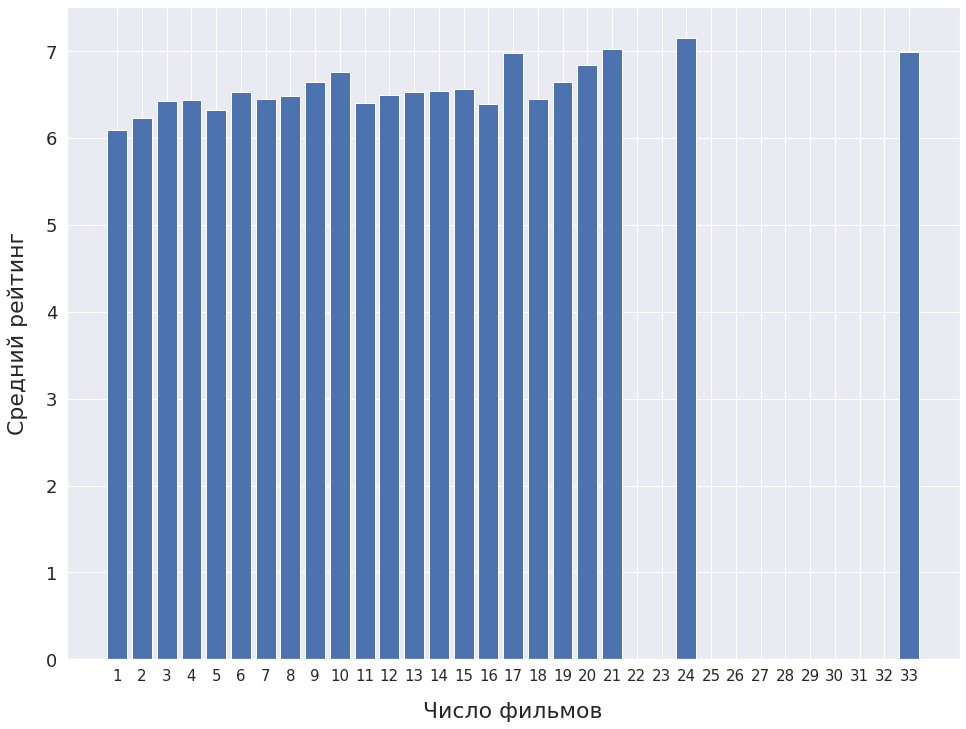

In [41]:
final_dict = {}
for i in range(1, max(director_film_count.values()) + 1):
    final_dict[str(i)] = data[data.director.isin(film_count_director[i])].score.mean()

plt.bar(final_dict.keys(), final_dict.values())
plt.xlabel('Число фильмов', labelpad=18, size=22)
plt.ylabel("Средний рейтинг", labelpad=18, size=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=18)
plt.savefig('directors.png')

In [42]:
d_max, d_mean = {}, {}
for director in data.director.unique():
    scores = data[data.director == director].score
    d_max[director] = scores.max()
    d_mean[director] = scores.mean()

In [43]:
import operator
sorted_max = sorted(d_max.items(), key=operator.itemgetter(1), reverse=True)
sorted_mean = sorted(d_mean.items(), key=operator.itemgetter(1), reverse=True)

In [44]:
top_max = [sorted_max[i][0] + ' ' + str(round(sorted_max[i][1], 3)) for i in range(25)]
top_mean = [sorted_mean[i][0] + ' ' + str(round(sorted_mean[i][1], 3))  for i in range(25)]
pd.DataFrame(data={'Максимальный рейтинг': top_max, 'Средний рейтинг': top_mean})

,Максимальный рейтинг,Средний рейтинг
0,Frank Darabont 9.3,Nitesh Tiwari 8.7
1,Christopher Nolan 9.0,Anurag Kashyap 8.6
2,Steven Spielberg 8.9,Olivier Nakache 8.6
3,Quentin Tarantino 8.9,Marco Tullio Giordana 8.5
4,Peter Jackson 8.9,Aamir Khan 8.5
5,Robert Zemeckis 8.8,Makoto Shinkai 8.5
6,David Fincher 8.8,Nishikant Kamat 8.4
7,Martin Scorsese 8.7,Damien Chazelle 8.35
8,Lana Wachowski 8.7,Christopher Nolan 8.322
9,Fernando Meirelles 8.7,Majid Majidi 8.3


In [45]:
data[data.director=='Lee Unkrich']

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
5309,200000000.0,Walt Disney Pictures,USA,Lee Unkrich,Animation,415004880.0,Toy Story 3,G,2010-06-18,103,8.3,Tom Hanks,603472,John Lasseter,2010


In [46]:
data[data.director=='Sujoy Ghosh']

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
5913,0.0,Boundscript,India,Sujoy Ghosh,Drama,1035953.0,Kahaani,NOT RATED,2012-03-09,122,8.2,Vidya Balan,45452,Sujoy Ghosh,2012


#### + видно, что у лидеров по среднему рейтингу фильмов он совпадает с масимальным рейтингом их фильма

In [47]:
d_max, d_mean = {}, {}
for director in data.director.unique():
    scores = data[data.director == director].score
    if len(scores) > 2:
        d_max[director] = scores.max()
        d_mean[director] = scores.mean()

In [48]:
sorted_max = sorted(d_max.items(), key=operator.itemgetter(1), reverse=True)
sorted_mean = sorted(d_mean.items(), key=operator.itemgetter(1), reverse=True)

In [49]:
top_max = [sorted_max[i][0] + ' ' + str(round(sorted_max[i][1], 3)) for i in range(25)]
top_mean = [sorted_mean[i][0] + ' ' + str(round(sorted_mean[i][1], 3))  for i in range(25)]
pd.DataFrame(data={'Максимальный рейтинг': top_max, 'Средний рейтинг': top_mean})

,Максимальный рейтинг,Средний рейтинг
0,Frank Darabont 9.3,Christopher Nolan 8.322
1,Christopher Nolan 9.0,Pete Docter 8.2
2,Steven Spielberg 8.9,Quentin Tarantino 8.163
3,Quentin Tarantino 8.9,Hayao Miyazaki 8.14
4,Peter Jackson 8.9,Asghar Farhadi 8.05
5,Robert Zemeckis 8.8,Frank Darabont 7.975
6,David Fincher 8.8,Emir Kusturica 7.933
7,Martin Scorsese 8.7,Krzysztof Kieslowski 7.925
8,Lana Wachowski 8.7,James Cameron 7.883
9,Fernando Meirelles 8.7,Satoshi Kon 7.85


In [50]:
collections.Counter(data.genre)

Counter({'Adventure': 392,
         'Comedy': 2080,
         'Action': 1331,
         'Drama': 1444,
         'Crime': 522,
         'Thriller': 18,
         'Horror': 277,
         'Animation': 277,
         'Biography': 359,
         'Sci-Fi': 13,
         'Musical': 4,
         'Family': 14,
         'Fantasy': 32,
         'Mystery': 38,
         'War': 2,
         'Romance': 15,
         'Western': 2})

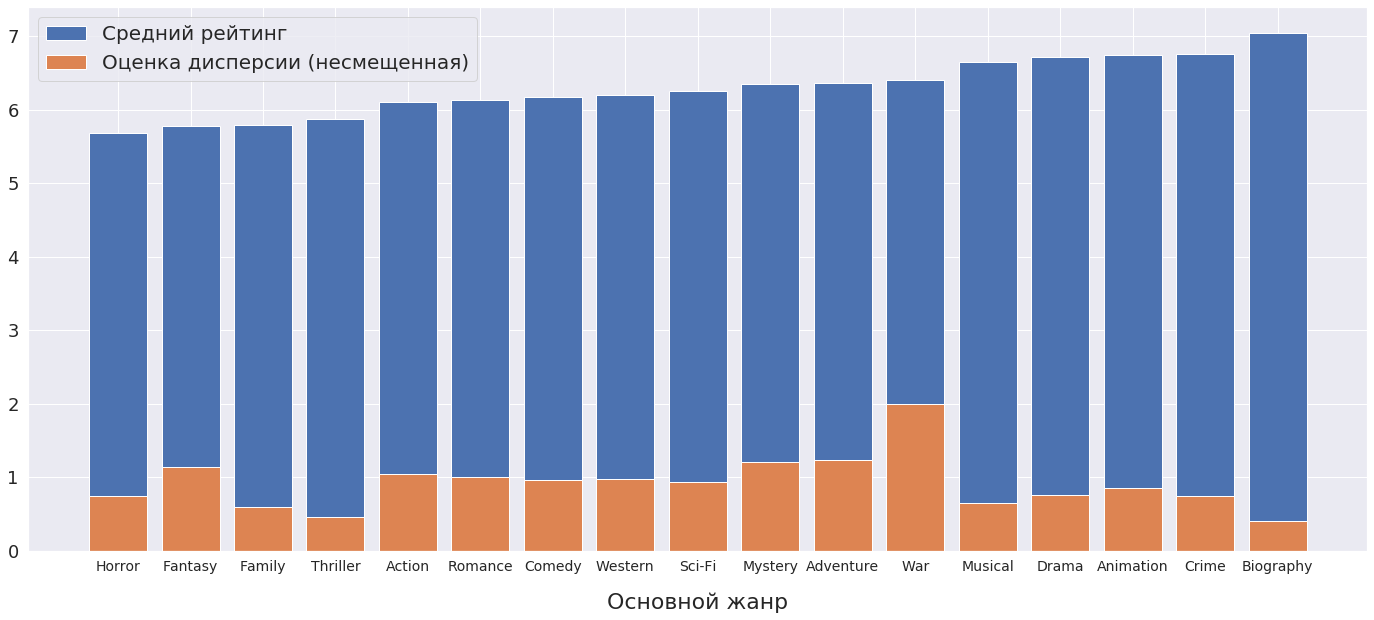

In [51]:
rcParams['figure.figsize'] = 24, 10

genre_scores, genre_std = {}, {}
for genre in data.genre.unique():
    genre_scores[genre] = data[data.genre == genre].score.mean()
    genre_std[genre] = np.std(data[data.genre == genre].score, ddof=1)**2
    
sorted_genre_scores = sorted(genre_scores.items(), key=operator.itemgetter(1))
    
plt.bar([el[0] for el in sorted_genre_scores], [el[1] for el in sorted_genre_scores])
plt.bar(genre_std.keys(), genre_std.values())
plt.xlabel('Основной жанр', labelpad=18, size=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=18)
plt.legend(['Средний рейтинг', 'Оценка дисперсии (несмещенная)'], loc='upper left',  prop={'size': 20})

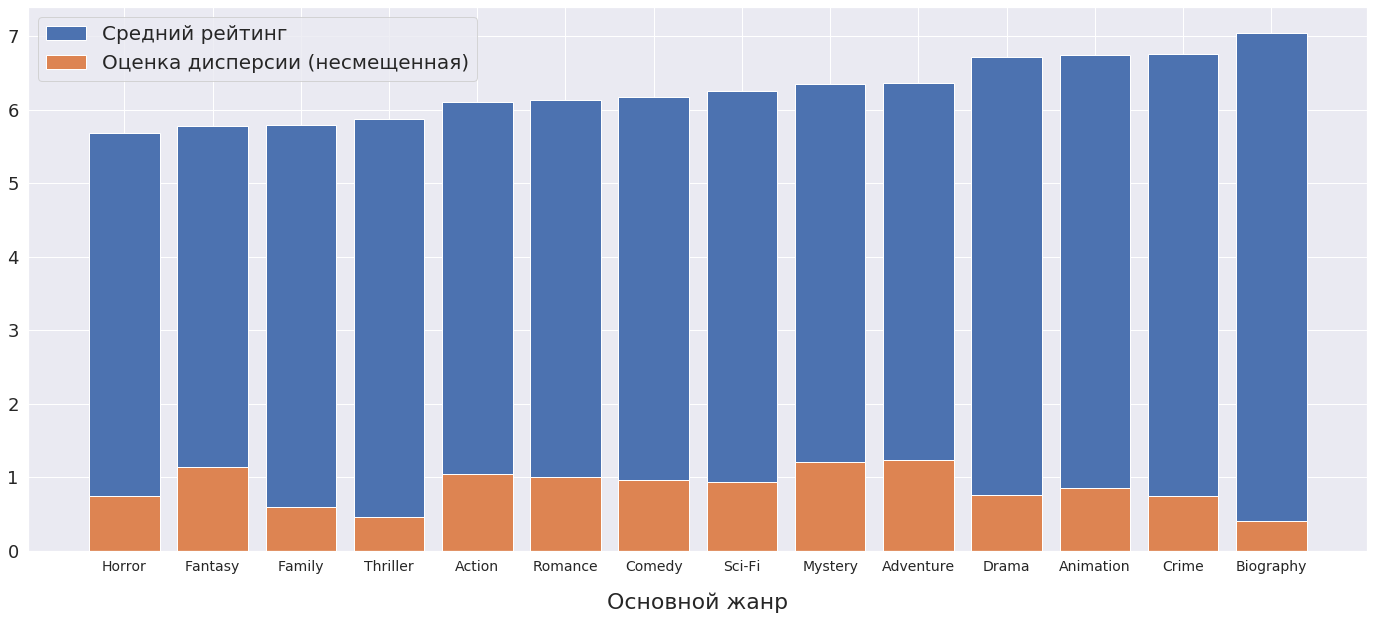

In [52]:
genre_scores = dict(sorted_genre_scores)
del genre_scores['War']
del genre_std['War']
del genre_scores['Western']
del genre_std['Western']
del genre_scores['Musical']
del genre_std['Musical']
sorted_genre_scores = sorted(genre_scores.items(), key=operator.itemgetter(1))

plt.bar([el[0] for el in sorted_genre_scores], [el[1] for el in sorted_genre_scores])
plt.bar(genre_std.keys(), genre_std.values())
plt.xlabel('Основной жанр', labelpad=18, size=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=18)
plt.legend(['Средний рейтинг', 'Оценка дисперсии (несмещенная)'], loc='upper left',  prop={'size': 20})
plt.savefig('genre_scores.png')